In [ ]:
import pandas as pd

df1 = pd.read_csv('data/Versions/V1/V1 grp_df.csv', index_col='Date'); df1.index = pd.to_datetime(df1.index)
df = pd.read_csv('data/Training Data/SNP 08-11.csv', index_col='Date'); df.index = pd.to_datetime(df.index)

In [110]:
# BT strat funciton

import backtrader as bt

class DebugStrategy(bt.Strategy):
    params = ()

    def __init__(self):
        print(self.datas[1].sentiment[0])  # Access sentiment line)
        pass

    def next(self):
        pass

def run(Strategy = DebugStrategy, initial_cash = 10000, commission = 0.001, img_path = 'data/Versions/V1/V1 Plot.png'):
    cerebro = bt.Cerebro()

    data = bt.feeds.PandasData(dataname=df, plot=True,fromdate=pd.to_datetime('2009-08-07'),todate=pd.to_datetime('2010-06-10'),)
    cerebro.adddata(data, name='OCHLV')

    class SentimentData(bt.feeds.PandasData):
        lines = ('sentiment',)
        params = (('sentiment', 'Sentiment'), ('datetime', None))
    data1 = SentimentData(dataname=df1, plot=False, fromdate=pd.to_datetime('2009-08-07'),todate=pd.to_datetime('2010-06-10'),)
    cerebro.adddata(data1, name='')

    cerebro.addstrategy(Strategy)

    cerebro.broker.setcash(initial_cash)
    cerebro.broker.setcommission(commission=commission)

    cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name='sharpe')
    cerebro.addanalyzer(bt.analyzers.Returns, _name='returns')
    cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name='trades')

    results = cerebro.run()
    strategy = results[0]

    print(f'Initial Portfolio Value: {initial_cash}, commission: {commission}')
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
    print('Sharpe Ratio:', strategy.analyzers.sharpe.get_analysis()['sharperatio'])
    print('Total Return:', strategy.analyzers.returns.get_analysis()['rtot'])
    print('Total Trades:', strategy.analyzers.trades.get_analysis()['total']['total'])

    # Plot result
    fig = cerebro.plot(style="candlestick")[0][0]
    fig.savefig(img_path)

In [111]:
class Strategy1(bt.Strategy):
    params = (('sentiment_threshold', 0.3),)

    def __init__(self):
        self.sentiment = self.datas[1].sentiment  # Access sentiment line
        self.order = None  # To keep track of pending orders

    def next(self):
        date = self.datas[0].datetime.date(0)
        sentiment = self.sentiment[0]
        if self.order:
            return
        if self.position.size != 0:
            self.close()
            print(f'close at {date}')
        if sentiment > self.params.sentiment_threshold:
            self.buy()
            print(f'buy at {date}, price: {self.datas[0].close[0]}')
        if sentiment < -self.params.sentiment_threshold:
            self.sell()
            print(f'sell at {date}, price: {self.datas[0].close[0]}')

run(Strategy1, img_path = 'data/Versions/V1/V1 Strat1 Plot.png')

buy at 2009-08-07, price: 4.974267482757568
close at 2009-08-10
sell at 2009-08-10, price: 4.950528144836426
close at 2009-08-11
buy at 2009-08-11, price: 4.893722534179688
close at 2009-08-12
buy at 2009-08-12, price: 4.968258857727051
close at 2009-08-13
buy at 2009-08-13, price: 5.061724662780762
close at 2009-08-14
buy at 2009-08-14, price: 5.012436866760254
close at 2009-08-17
buy at 2009-08-17, price: 4.796347141265869
close at 2009-08-18
buy at 2009-08-18, price: 4.928887367248535
close at 2009-08-19
buy at 2009-08-19, price: 4.946918964385986
close at 2009-08-20
buy at 2009-08-20, price: 4.998914241790772
close at 2009-08-21
buy at 2009-08-21, price: 5.085769176483154
close at 2009-08-24
buy at 2009-08-24, price: 5.080961227416992
close at 2009-08-25
buy at 2009-08-25, price: 5.091179370880127
close at 2009-08-26
buy at 2009-08-26, price: 5.031373977661133
close at 2009-08-27
buy at 2009-08-27, price: 5.092679500579834
close at 2009-08-28
buy at 2009-08-28, price: 5.11071395874

In [ ]:
from IPython.display import Image
Image('data/Versions/V1/V1 Strat1 Plot.png')

In [108]:
class Strategy2(bt.Strategy):
    params = (('sentiment_threshold', 0.3),)

    def __init__(self):
        self.sentiment = self.datas[1].sentiment  # Access sentiment line
        self.order = None  # To keep track of pending orders

    def next(self):
        date = self.datas[0].datetime.date(0)
        sentiment = self.sentiment[0]
        if self.order:
            return
        if self.position.size != 0:
            self.close()
            print(f'close at {date}')
        if sentiment > self.params.sentiment_threshold:
            self.buy(size = round(sentiment))
            print(f'buy at {date}, price: {self.datas[0].close[0]}')
        if sentiment < -self.params.sentiment_threshold:
            self.sell(size = round(-sentiment))
            print(f'sell at {date}, price: {self.datas[0].close[0]}')

run(Strategy2, img_path='data/Versions/V1/V1 Strat2 Plot.png')

buy at 2009-08-07, price: 4.974267482757568
close at 2009-08-10
sell at 2009-08-10, price: 4.950528144836426
close at 2009-08-11
buy at 2009-08-11, price: 4.893722534179688
close at 2009-08-12
buy at 2009-08-12, price: 4.968258857727051
close at 2009-08-13
buy at 2009-08-13, price: 5.061724662780762
close at 2009-08-14
buy at 2009-08-14, price: 5.012436866760254
close at 2009-08-17
buy at 2009-08-17, price: 4.796347141265869
close at 2009-08-18
buy at 2009-08-18, price: 4.928887367248535
close at 2009-08-19
buy at 2009-08-19, price: 4.946918964385986
close at 2009-08-20
buy at 2009-08-20, price: 4.998914241790772
close at 2009-08-21
buy at 2009-08-21, price: 5.085769176483154
close at 2009-08-24
buy at 2009-08-24, price: 5.080961227416992
close at 2009-08-25
buy at 2009-08-25, price: 5.091179370880127
close at 2009-08-26
buy at 2009-08-26, price: 5.031373977661133
close at 2009-08-27
buy at 2009-08-27, price: 5.092679500579834
close at 2009-08-28
buy at 2009-08-28, price: 5.11071395874

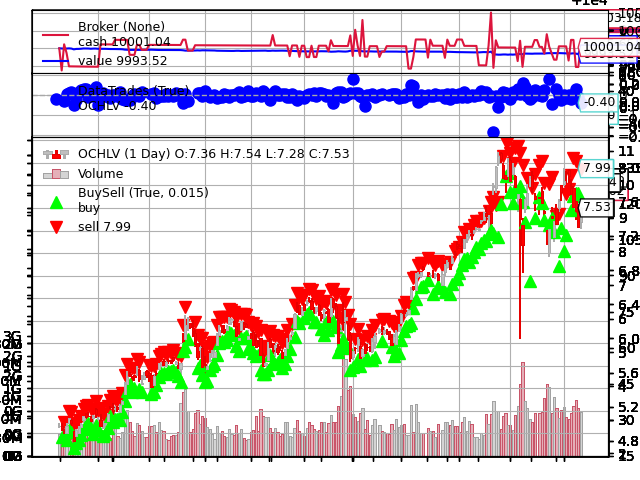

In [109]:
from IPython.display import Image
Image('data/Versions/V1/V1 Strat2 Plot.png')